<a href="https://colab.research.google.com/github/zulfijauh/Data-Science/blob/main/Bank_Jago_Review_from_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dokumentasi ini mengambil review dengan rating 1 - 3 dari aplikasi Bank Jago di playstore. Tujuan kegiatan ini untuk melihat apa saja hal yang harus diperbaiki oleh developer untuk meningkatkan kepuasan pelanggan.

* By: Zulfi Jauarul Ikhsan
* Say Hi!: https://www.linkedin.com/in/zulfi-jauharul-ikhsan-b1b9071bb/
* Codes documentation: https://github.com/zulfijauh/Data-Science

In [2]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.5-py3-none-any.whl size=24484 sha256=0aec54d38244048af81178ccd6d44f60f14cead17a82a4ae5e848cdb2cff3ce4
  Stored in directory: /root/.cache/pip/wheels/4a/26/18/48fda51f20c9e550c735fa6f3a6887dc8836f8d709a3cf8a9c
Successfully built google-play-scraper


In [4]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd
import numpy as np

In [236]:
score_1 = reviews_all('com.jago.digitalBanking', # reviews(count=) untuk spesifik jumlah review
                      sleep_milliseconds=0, # defaults = 0
                      #lang = 'id', #defaults = en
                      country='id', # defaults = 'us'
                      sort=Sort.MOST_RELEVANT, # NEWEST / OLDEST
                      filter_score_with= 1 # Ratings score
                      )

score_2 = reviews_all('com.jago.digitalBanking',
                      sleep_milliseconds=0, 
                      country='id',
                      sort=Sort.MOST_RELEVANT,
                      filter_score_with= 2
                      )

score_3 = reviews_all('com.jago.digitalBanking',
                      sleep_milliseconds=0, 
                      country='id', 
                      sort=Sort.MOST_RELEVANT,
                      filter_score_with= 3
                      )

In [237]:
# Membuat dataframe dengan mnggabungkan data dari rating 1 - 3
df = pd.DataFrame(score_1).append(pd.DataFrame(score_2).append(pd.DataFrame(score_3)))
# Filter hanya di tahun 2022
df = df[df['at'].dt.year == 2022]
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGXFUvtiq45EN6VhPLBjuNMA4QRnRIcFoykm81...,ERN Purchase,https://play-lh.googleusercontent.com/a/AATXAJ...,I just activated my Jago account and the regis...,1,13,7.1.0,2022-04-19 09:07:48,Hello Jagoan! We apologize for the inconvenien...,2022-04-19 15:19:41
1,gp:AOqpTOGvhWNKyy4Ukx55H00fE6w7IFgRWoZ2pgXQwy3...,Fadlan Hamid Alfebi,https://play-lh.googleusercontent.com/a-/AOh14...,Cannot finish selfie verification. The circle ...,1,2,6.9.2,2022-03-21 06:46:29,Hi Jagoan! Sorry for the inconvenience. Can yo...,2022-03-21 14:29:49
2,gp:AOqpTOHAguRdDD5Mh4MJxhAwgs0E7zTRrinEnqYNWT2...,Muhammad Alvido,https://play-lh.googleusercontent.com/a-/AOh14...,Very dissapointed. I transferred money using j...,1,3,7.2.0,2022-04-22 08:39:13,Hi Jagoan! Sorry for the inconvenience. Can yo...,2022-04-22 12:56:02
3,gp:AOqpTOEbhZauLGKVn49jck4-tPjmSFlxwxBQ-1IvQXw...,Cordelia de Lima,https://play-lh.googleusercontent.com/a/AATXAJ...,Stupid app!! Can not even pass the registratio...,1,25,6.8.2,2022-02-28 05:07:03,Hi Jagoan! Sorry for the inconvenience. Can yo...,2022-02-28 06:32:39
4,gp:AOqpTOFN3hgxLpnBafQqh24fYmsMsTL_msPXnYz7kk8...,Khrista W,https://play-lh.googleusercontent.com/a/AATXAJ...,Worst customer support ever had in Indo's Digi...,1,9,6.4.2,2022-01-14 10:33:17,"Hi Jagoan, so sorry for the inconvenience. We ...",2022-03-07 06:56:33


In [238]:
# Cek isi review sekilas
df['content']

0      I just activated my Jago account and the regis...
1      Cannot finish selfie verification. The circle ...
2      Very dissapointed. I transferred money using j...
3      Stupid app!! Can not even pass the registratio...
4      Worst customer support ever had in Indo's Digi...
                             ...                        
107    Proses kirim uang lama, tidak ada notifikasi p...
108    Apps bagus tapi bila mau ada maintance, diinfo...
113    Susah untuk login, verifikasi ponsel tidak did...
116                                               I like
196                                              Lag app
Name: content, Length: 478, dtype: object

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [56]:
# Stopword bahasa indonesia
pip install Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [256]:
#menggabungkan seluruh review menjadi satu kelompok
text = " ".join(review for review in df.content)

In [255]:
stop_factory = StopWordRemoverFactory()
# Filter kata yang tidak ingin ditampilkan
more_stopword = ['ngga', 'padahal', 'kan', 'isi', 'muncul', 'mengganggu','terlalu','banyak','bank','yg','gak','ga','mau','sama','baru','pake','jago','pindahin','dipakai','via','hari','jumat','tp','gk','udh','jg','malah','doang','udah', 'lebih','gabisa','salah','kalau','bahkan','tetap','minta','waktu','gimana','kali','bagus','terus','langsung','suruh','pas','sm','aja','nya','bener','coba','bgt','sdh','beberapa','sesuai','dapet','jangan','apa','gw','buat','dr','banget','sekarang','mending','pakai','sekali','jelas','jadi','cuma', 'lah','katanya','kok','dulu'] 
stopword_id = stop_factory.get_stop_words()+more_stopword+list(STOPWORDS)
stopword = stop_factory.create_stop_word_remover()

In [257]:
# Membuat word cloud image:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black',colormap = 'cool', stopwords = stopword_id, max_words=200).generate(text)

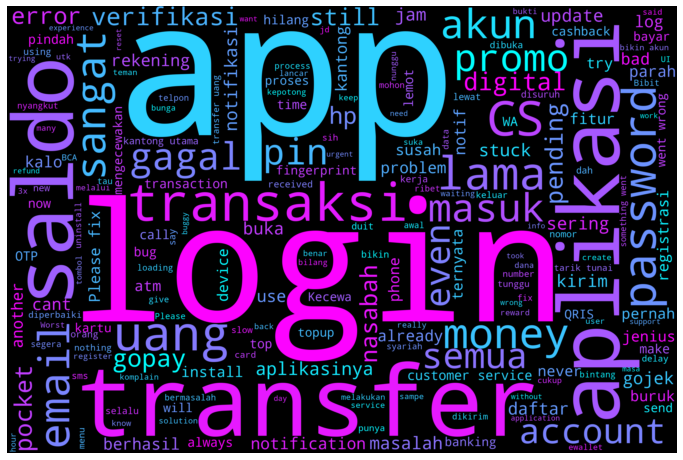

In [258]:
# Display wordcloud
plt.figure(figsize=(12, 25))
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off");

In [ ]:
'mending','pakai','sekali','jelas','jadi','cuma', 'lah','katanya','kok','dulu'

In [263]:
detail = list(df['content'][df['content'].str.contains('CS', regex=False, case=False, na=False)])

# beberapa review dengan keywords app
for i in detail[:10]:
  print(detail.index(i),')', i, '\n')

0 ) Insecure app. Very bad customer services. I lost my money about 4 times, trying to get help, ticket has received at 14 Jan '22 and they said it will be processed in 1x24 hours. Sadly, there's nothing, exactly nothing any news, any result until today 27 Jan '22, and when I asked the CS they only said it will be follow up again and again. After this problem solved, I think I won't use this worse app anymore. 👎👎👎 

1 ) The LEAST RELIABLE banking app ever. Takes TOO long for a single transfer. Can't even handle such a basic function of digital bank like money transfers. No notif whatsoever when it's under maintenance or having issues. The CS is definitely the WORST. No SLA. Even with your proactive follow up efforts, they still take days to give you reply with only ZERO result in the end. And who would believe that your complain has actually been investigated when they can't even get your name right? 

2 ) I can't login today. Please help. Already sent email to cs but no reply. I will 